#  Lab 1: Grade Point Average Prediction

In this Lab we are tasked with designing a system to make admission decisions at the University of Pennsylvania (Penn). In order to design this system we need to specify requirements, acquire data and create a model to substantiate our decisions. 

## 1.B: Gradient Descent

## 0. Environment setup

We will first import the necessary Python Packages. We will use Numpy to load the data, pytorch to process it and matplotlib to plot and visualize results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
torch.set_default_dtype(torch.float64)
plt.style.use('default')

### Data Loading

In [2]:
data = torch.from_numpy( np.genfromtxt ('data.csv', delimiter=",", skip_header=1, dtype = float ) )

print(f"Number of students: {data.shape[0]}")
print(f"Number of variables: {data.shape[1]}")
print(f"\nExample student: \nHigh-school GPA: {data[0, 0]} \t SAT score: {data[0, 1]}\t Penn GPA: {data[0, 2]}\t Female {data[0, 3]}\t Male {data[0, 4]}")

Number of students: 600
Number of variables: 5

Example student: 
High-school GPA: 3.79 	 SAT score: 1540.0	 Penn GPA: 3.53	 Female 0.0	 Male 1.0


## 1. Empirical Risk Minimization

In Section 1A.2.4.2 we considered the least squares prediction of Penn GPAs based on high school GPAs and SAT scores. This is an example of a more general class of problems that are known as empirical risk minimization (ERM).

Consider a generic collection of $N$ data pairs $(x_i, y_i)$ along with predictions $\hat{y} = \Phi(x;w)$. In the function $\Phi(x;w)$ the variable $x$ is an input and $w$ is a parameter to be determined. We say that $\Phi(x;w)$ is a learning parameterization. The goal is to compare outputs $y_i$ with predictions $\hat{y}_i = \Phi(x_i;w)$ so as to find a suitable value of $w$. With this parameter value on hand we can then make predictions $\hat{y} = \Phi(x;w)$ for input variables $x$ for which the output $y$ has not been observed yet. 

In order to find suitable values for $w$ we introduce a loss function $\ell(y,\hat{y})\geq0$ which we use to evaluate the cost of predicting $\hat{y}$ when the true value realized by the world is $y$. Given that we have $N$ data points $x_i$ for which the true output of the system is known to be $y_i$, we define the empirical risk associated with parameter $w$ as

\begin{equation}\label{eqn_er}   
   r(w) 
      ~=~ \frac{1}{N} 
             \sum_{i=1}^{N} \ell \big( y_i, \hat{y}_i \big)
      ~=~ \frac{1}{N} 
             \sum_{i=1}^{N} \ell \Big( y_i, \Phi(x_i; w) \Big) ~.
\end{equation}


The empirical risk $r(w)$ measures the predictive power of coefficient $w$. The quantity $\ell ( y_i, \hat{y}_i )$ is always nonnegative and indicates how close the predicted output $\hat{y}_i$ is to the true output $y_i$. The empirical risk averages this metric over all available datapoints. It follows that a natural choice for $w$ is the value that makes the empirical risk smallest. We therefore define the optimal coefficient as the one that solves the following empirical risk minimization (ERM) problem
%
\begin{equation}\label{eqn_erm}   
   w^* 
      ~=~ \text{argmin}_w 
             r(w) 
      ~=~ \text{argmin}_w \frac{1}{N} 
             \sum_{i=1}^{N} 
                \ell \Big( y_i, \Phi(x_i; w) \Big) ~.
\end{equation}

**Task:** Show that the linear MMSE problem is an ERM problem.

## 2. Gradient Descent

To do Empirical Risk Minimization we use a gradient descent algorithm. Begin by taking the gradient of the empirical risk $r(w)$ with respect to the parameter $w$. If this parameter has $p$ components, i.e., if $w=[w_1; w_2; \ldots; w_p]$, the gradient of $r(w)$ is defined as  

\begin{equation}\label{eqn_gradient}   
  g(w)
      ~:=~ \left[
              \frac{\partial r(w)}{w_1};
              \frac{\partial r(w)}{w_2};
              \ldots;
              \frac{\partial r(w)}{w_p}
           \right].
\end{equation}

Indeed, let $\epsilon>0$ be a sufficiently small scalar and suppose that we start at $w_0$ and move to the point 

\begin{equation}\label{eqn_gradient_step}   
   w = w_0 - \epsilon g(w).
\end{equation}

Particularizing to the variable $w$ results in the epression

\begin{alignat}{3}\label{eqn_taylor_gradient_step}   
  r(w)
      &~:=~ r(w_0) ~+~ g^T(w) (- \epsilon g(w)) &&~+~ e(w) \nonumber\\
      &~:=~ r(w_0) ~-~ \epsilon \|g(w)\|^2 &&~+~ e(w).
\end{alignat}

The residual is of order $\epsilon^2$ and the squared gradient norm $\|\nabla^Tr(w)\|^2$ is nonnegative. Thus, as long as $\epsilon$ is sufficiently small we have that 

\begin{alignat}{3}\label{eqn_gradient_step_reduction}   
   r(w) \leq r(w_0)
\end{alignat}

This observation motivates the proposals of a recursive algorithm to find the minimum of the empirical risk function. In this algorithm we consider an iteration index $k$ at which point the parameter takes the value $w(k)$. The parameter is then updated by following the negative gradient so that the next iterate is 

\begin{alignat}{3}\label{eqn_gradient_descent}   
   w(k+1) = w(k) - \epsilon g(w(k)).
\end{alignat}

Since this holds for all iterations $k$, subsequent iterates result in subsequent reductions of the empirical risk $r(w(k))$. This argument can be formalized to prove that under certain regularity assumptions on the empirical risk $w(k)$ converges to $w^*$. In practice, we set a total number of iterations $K$ and use $x(K)$ as an approximation for $w^*$

## 2.1 Gradient Descent for Linear MMSE

For the particular case of linear MMSE the objective to be minimized a quadratic cost. The gradient $g(w_k)$ is then given by the expression

\begin{equation}\label{eqn_mmse_gradient}   
    g(w_k) 
       ~=~ -\frac{1}{N} 
              \sum_{i=1}^{N} x_i \Big(\, y_i - w^T(k) x_i \,\Big) ~.
\end{equation}

The gradient descent algorithm for this particular case is obtained by:

\begin{alignat}{3}\label{eqn_mmse_gradient_descent}   
   w(k+1) 
      ~=~ w(k) 
             - \frac{\epsilon}{N} 
                  \sum_{i=1}^{N} x_i \Big(\, w^T(k) x_i - y_i \,\Big) ~.
\end{alignat}


**Task:** Implement gradient descent for the data loaded in Task 1A.1. Plot the value of the empirical risk $r(w(k))$ as a function of the iteration index $k$.

The implementation is complicated by the fact that the range of GPA and SAT scores have vast differences. To reduce this complication we perform data normalization. This requires that we compute mean and variances. For the particular case of SAT scores these are given by

\begin{equation}\label{eqn_sat_mean_and_var}   
   \bar{\text{SAT}}
      ~=~ \frac{1}{N} 
             \sum_{i=1}^{N} \text{SAT}_i ,
   \qquad
   \text{var}(\text{SAT})
         ~=~ \frac{1}{N} 
             \sum_{i=1}^{N} \Big(\,\text{SAT}_i - \bar{\text{SAT}}\,\Big)^2.
\end{equation}

Normalized SAT scores for each individual student $i$ are then defined as

\begin{equation}\label{eqn_sat_normalization}   
   \tilde{\text{SAT}}
      ~=~ \Big(\, \text{SAT}_i - \bar{\text{SAT}} \,\Big) 
             \bigg / \Big(\, \text{var}(\text{SAT}) \,\Big)^{1/2} .
\end{equation}

The same normalization can be undertaken for high school and Penn GPAs. Implement this normalization and use this normalized data to implement gradient descent. 

In [3]:
# Compute the mean and standard deviation of each variable.
means = torch.mean(data[:,:3], dim = 0)
stds = torch.std(data[:,:3], dim = 0)

# Substract the mean and divide by the std each variable.
data_norm = data.clone()
data_norm[:, :3] = (data[:, :3] - means) / stds 

# Save each column in a different variable
high_school_gpa_norm = data_norm[:,0]
sat_scores_norm = data_norm[:,1]
penn_gpa_norm = data_norm[:,2]

# Observe that the resulting variables have mean 0 and standard deviation 1.
print(f"Mean {torch.mean(high_school_gpa_norm):.3f}")
print(f"Std {torch.std(high_school_gpa_norm):.3f}")

Mean 0.000
Std 1.000


**Task (continued):** Compute $w^*$ for this normalized data. Plot the value $\|w(k) -w^*\|^2$ of the distance between iterates $w(k)$ and the optimal parameter $w^*$. Notice that these plot is possible because we have access to the optimal argument $w^*$. This is not always the case.

This task requires that you try different values for the step sizes $\epsilon$ and the total number of iterations $K$.

In [4]:
# Functions that compute MSE and its gradient wrt w.

def mean_squared_error(y, y_pred):
    '''
    Computes mean squared error between two tensors
    Inputs: 
        y, ypred (torch Tensor)
    Output:
        mse (torch Tensor)
    '''
    return torch.mean((y-y_pred)**2)

def mean_squared_error_gradient(y, x, w):
    '''
    Computes the Gradient mean of squared error for a linear model,
    given its target output, input and parameters.
    Inputs: 
        y (torch Tensor): target output
        x (torch Tensor): inputs
        w (torch Tensor): model Parameters
    Output:
        gradient (torch Tensor)
    '''
    return -x.T@(y-x@w)/len(y)

In [5]:

def train_gradient_descent(x, y, K = 150, epsilon = 0.1, w0 = torch.rand(2)-0.5):
    """
    Linar MMSE with Gradient Descent.
    Inputs:
        x: torch Tensor
            Input data matrix

        y: torch Tensor
            Target Values

        K: int
            Max. number of iterations.

        epsilon: float
            Learning rate.
    
    Output:
        w: torch Tensor
            Trained parameters

        mse_evolution: list
            Evolution of mean squared error during training.

        wdist_evolution: list
            Evolution of distance between w and the optimal, closed-form w.
        
    """
    
    # lists that store the evolution of MSE and ||w-w_star ||^2 
    mse_evolution = [] 
    wdist_evolution = []
    
    # Initial w
    w = w0.clone()
    
    # Optimal parameter vector in closed form
    w_star = torch.linalg.inv(x.T@x)@x.T@y
    wdist_evolution.append(torch.sum((w-w_star)**2))

    for k in range(K):
        
        # Compute predictions
        y_pred = x@w

        # Compute error
        mse = mean_squared_error(y, y_pred)
        mse_evolution.append(mse)

        # Compute gradients
        grad = mean_squared_error_gradient(y, x, w)

        # Update parameters
        w -= epsilon*grad
        wdist = torch.sum((w-w_star)**2)
        wdist_evolution.append(wdist)
        
    return w, mse_evolution, wdist_evolution


In [6]:
# We use both the normalized HS GPA and the SAT scores
x = data_norm[:,:2] 

# The targets are the normalized Penn GPA values
y = penn_gpa_norm

Learning rate: 0.03, MSE: 0.838, ||w-w*||^2: 0.001
Learning rate: 0.30, MSE: 0.837, ||w-w*||^2: 0.000
Learning rate: 1.84, MSE: 1.068, ||w-w*||^2: 0.213


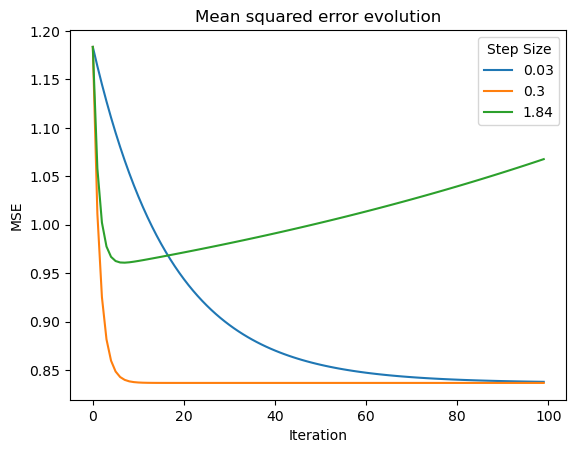

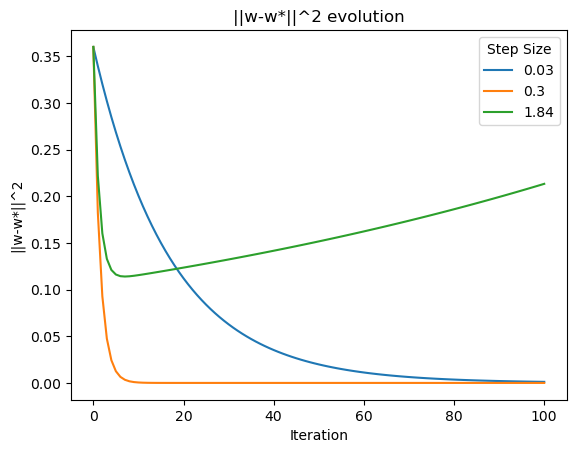

In [7]:
w0 = torch.rand(2)-0.5
epsilons = [0.03, 0.3, 1.84]

for epsilon in epsilons:
    w, mse_evolution, wdist_evolution = train_gradient_descent(x, y, K = 100, epsilon = epsilon, w0 = w0)
    
    plt.figure(1)
    _ = plt.plot(mse_evolution, "-")
    
    plt.figure(2)
    _ = plt.plot(wdist_evolution, "-")
    
    print(f"Learning rate: {epsilon:.2f}, MSE: {mse_evolution[-1]:.3f}, ||w-w*||^2: {wdist_evolution[-1]:.3f}")
    
plt.figure(1)
_ = plt.title("Mean squared error evolution")
_ = plt.xlabel("Iteration")
_ = plt.ylabel("MSE")
plt.legend(epsilons, title = "Step Size")

plt.figure(2)
_ = plt.title("||w-w*||^2 evolution")
_ = plt.xlabel("Iteration")
_ = plt.ylabel("||w-w*||^2")
plt.legend(epsilons, title = "Step Size")
    

## 3. Stochastic Gradient Descent

The gradient of the linear MMSE cost is expressed as an average over dataset entries $(x_i, y_i)$. Indeed, to compute the gradient we evaluate $x_i (y_i - w^T(k) x_i)$ for each data pair $(x_i, y_i)$ and take the average. This is a feature that is common to all empirical risks. 

This is true because the empirical risk itself is an average. If we consider the generic expression for $ r (w)$, the gradients of the empirical risk are given by

\begin{equation}\label{eqn_erm_gradient}   
    g(w) 
       ~=~ \frac{1}{N} 
              \sum_{i=1}^{N} 
                \frac{\partial}{\partial w} 
                   \ell \Big( y_i, \Phi(x_i; w) \Big)~.
\end{equation}

The gradient $g(w)$ is then an average of the gradients $\partial(\ell( y_i, \Phi(x_i; w))/\partial w$ that correspond to the evaluation of the loss $\ell( y_i, \Phi(x_i; w))$ at each individual data pair $(x_i, y_i)$.

That the gradient is expressed as an average implies that computing gradients of the empirical risk is expensive and unnecessary. It is expensive because we need to compute gradients of the loss associated with each individual data pair $(x_i, y_i)$. When the dataset is large, this is a considerable number of gradients that need to be computed. It is unnecessary because an average can be accurately approximated by considering a smaller number of samples. This average of gradients over a smaller number of samples is known as a stochastic gradient.

For a formal definition consider a random choice of $B$ entries of the dataset and define the stochastic gradient of the empirical risk as

\begin{equation}\label{eqn_erm_stochastic_gradient}   
    \hat{g}(w) 
       ~=~ \frac{1}{B} 
              \sum_{i=1}^{B} 
                \frac{\partial}{\partial w} 
                   \ell \Big( y_i, \Phi(x_i; w) \Big)~.
\end{equation}

The expression is the same as before, except that instead of having a sum over the $N$ entries of the dataset we have a sum over $B$ randomly chosen entries. Although not required by its definition, the presumption is that $B \ll N$ and that, as a consequence, the computational cost of evaluating stochastic gradients is much smaller than the computational cost of evaluating full gradients.

We can use stochastic gradients in an iterative algorithm. Consider then an iteration index $k$ and a step size $\epsilon$. At iteration $k$ the parameter value $x(k)$ is updated according to the recursion

\begin{alignat}{3}\label{eqn_stochastic_gradient_descent}   
   w(k+1) = w(k) - \epsilon \hat{g}(w(k)).
\end{alignat}

Since we expect that **stochastic** gradients $\hat{g}(w(k))$ are close to the actual gradients $g(w(k))$ we expect **stochastic** gradient descent iteration to be similar to the gradient descent iteration. 

**Task :** Implement the stochastic gradient descent algorithm on the normalized scholastic performance data. Plot the value of the empirical risk $r(w(k))$ as a function of the iteration index $k$. 

This task requires that you try different values step sizes $\epsilon$ and batch sizes. The plots in Figure 3 show the empirical risk $r(w(k))$ as a function of the iteration index $k$ for different values of $\epsilon$ and $B$. 

In [8]:

def train_stochastic_gradient_descent(x, y, K = 150, epsilon = 0.1, w0 = torch.rand(2)-0.5, B = 64):
    """
    Linar MMSE with Gradient Descent.
    Inputs:
        x: torch Tensor
            Input data points

        y: torch Tensor
            Target Values

        K: int
            Max. number of iterations.

        epsilon: float
            Learning rate.
            
        w0: torch Tensor
            Initial parameter vector
            
        B: int
            Batch Size
    
    Output:
        w: torch Tensor
            Trained parameters

        mse_evolution: list
            Evolution of mean squared error during training.

        wdist_evolution: list
            Evolution of distance between w and the optimal, closed-form w.
        
    """
    
    # lists that store the evolution of MSE and ||w-w_star ||^2 
    mse_evolution = [] 
    wdist_evolution = []
    
    # Initial w
    w = w0.clone()
    
    # Optimal parameter vector in closed form
    w_star = torch.linalg.inv(x.T@x)@x.T@y
    wdist_evolution.append(torch.sum((w-w_star)**2))


    for k in range(K):
        
        # Randomly sample a batch from x and y.
        random_idxs = torch.randint(high=x.shape[0], size = (B,) ) 
        x_batch = x[random_idxs]
        y_batch = y[random_idxs]
        
        # Compute predictions
        y_pred = x_batch@w

        # Compute error
        # Mean squared error in Batch
        mse = mean_squared_error(y_batch, y_pred)
        
        # Total Mean squared error 
        total_mse = mean_squared_error(y, x@w)
        mse_evolution.append(total_mse)

        # Compute gradients
        grad = mean_squared_error_gradient(y_batch, x_batch, w)

        # Update parameters
        w -= epsilon*grad
        wdist = torch.sum((w-w_star)**2)
        wdist_evolution.append(wdist)

    return w, mse_evolution, wdist_evolution


Learning rate: 0.03, Final MSE: 0.837
Learning rate: 0.30, Final MSE: 0.837
Learning rate: 1.18, Final MSE: 0.849


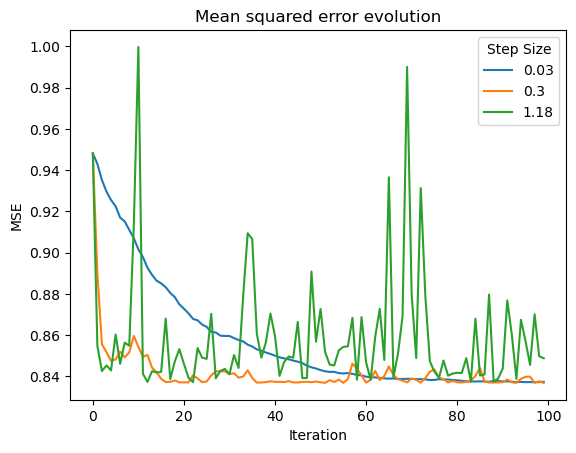

In [13]:
w0 = torch.rand(2)-0.5
epsilons = [0.03, 0.3, 1.18]
for epsilon in epsilons:
    w, mse_evolution, wdist_evolution = train_stochastic_gradient_descent(x, y, K = 100, epsilon = epsilon, w0 = w0, B = 128)
    
    plt.figure(1)
    _ = plt.plot(mse_evolution, "-")

    print(f"Learning rate: {epsilon:.2f}, Final MSE: {mse_evolution[-1]:.3f}")
    
plt.figure(1)
_ = plt.title("Mean squared error evolution")
_ = plt.xlabel("Iteration")
_ = plt.ylabel("MSE")
plt.legend(epsilons, title = "Step Size")


Learning rate: 1.18, MSE: 0.837
Learning rate: 1.18, MSE: 0.837
Learning rate: 1.18, MSE: 0.837


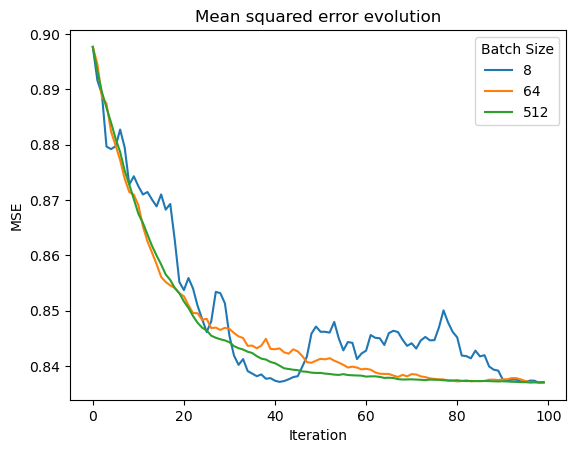

In [21]:
w0 = torch.rand(2)-0.5
batch_sizes = [8, 64, 512]
for B in batch_sizes:
    w, mse_evolution, wdist_evolution = train_stochastic_gradient_descent(x, y, K = 100, epsilon = 0.03, w0 = w0, B = B)
    
    plt.figure(1)
    _ = plt.plot(mse_evolution, "-")

    print(f"Learning rate: {epsilon:.2f}, MSE: {mse_evolution[-1]:.3f}")
    
plt.figure(1)
_ = plt.title("Mean squared error evolution")
_ = plt.xlabel("Iteration")
_ = plt.ylabel("MSE")
plt.legend(batch_sizes, title = "Batch Size")